In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame =True)

#### DATA FRAME in pandas #####
df = pd.DataFrame(data.data,columns=data.feature_names)
df2 = pd.DataFrame(data.target,columns=['target'])
final_dataset = pd.concat([df,df2],axis=1)
final_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [135]:
##### Dropping highly corelated columns #####################

final_dataset =  final_dataset.drop(['area error',
 'mean area',
 'mean concave points',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst concave points',
 'worst perimeter',
 'worst radius',
 'worst texture'],axis=1)

In [136]:
X = final_dataset.drop(['target'],axis=1)
y = final_dataset['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

In [137]:
####### Model building $$$$$$$$$$$$$$$$$$

from sklearn.ensemble import ExtraTreesRegressor
ex = ExtraTreesRegressor()
ex.fit(X_train_scaled,y_train)


ExtraTreesRegressor()

In [138]:
ex.feature_importances_

array([0.22909256, 0.03987875, 0.01640663, 0.0505464 , 0.23327993,
       0.01057422, 0.01474325, 0.06591845, 0.00806381, 0.00794097,
       0.01760352, 0.01350655, 0.0147586 , 0.01075113, 0.01983589,
       0.02646686, 0.05058795, 0.13967458, 0.0220785 , 0.00829143])

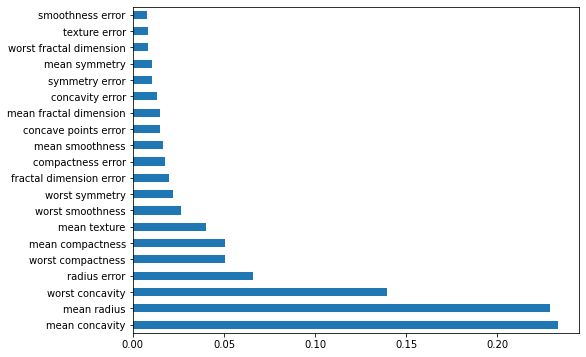

In [139]:
plt.figure(figsize=(8,6))
feat_importances = pd.Series(ex.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [140]:
from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred = ex_decision.predict(X_test_scaled)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        63
           1       0.88      0.89      0.88       108

    accuracy                           0.85       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.85      0.85      0.85       171

[[50 13]
 [12 96]]
accuracy is:  0.8538011695906432


NOTE : Accuracy if 10 columns are not dropped :: 91.81 %
       Accuracy if 10 columns are dropped :: 85.38 %     

In [142]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 15)}
    # decision tree model
dtree_model=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [143]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [144]:
################### MODEL BUILDING ############################
ex_decision1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
ex_decision1.fit(X_train_scaled,y_train)
y_pred = ex_decision1.predict(X_test_scaled)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

[[ 56   7]
 [  5 103]]
accuracy is:  0.9298245614035088


NOTE : 10 columns not dropped --criterion = 'entropy', max_depth = 3 ,After Hyperparamter tuning accuracy increased to 95.321 %
10 columns dropped -- criterion = 'entropy', max_depth = 6 ,After Hyperparamter tuning accuracy increased to 92.98 %